Current working directory: F:\tesla-optimus-business-analysis\notebooks

Listing files in current directory:
  data
  02_revenue_and_profit_margin_analysis.ipynb
  04_Tesla_Revenue_All_Scenarios.ipynb
  visualizations
  01_Tesla_R&D_trend_analysis_2020_2024.ipynb
  03_cash_flow_analysis_2020_2024.ipynb
  05_Tesla_Financial_Forecast_Optimistic.ipynb
  06_Tesla_Financial_Forecast_Normal.ipynb
  07_Tesla_Financial_Forecast_Conservative.ipynb
  .ipynb_checkpoints

Searching for Excel files in project...
Found 0 Excel files:

Could not find Tesla forecast file automatically.
Please provide the path to the Excel file:


Would you like to create a sample DataFrame for testing? (yes/no):  yes



Creating sample data for analysis...
Sample data created successfully!

Sample data preview:
    Year  Total Revenue  Net Income  Total Assets  Total Equity  Gross_Margin  \
0   2022          81462       12587        106618         62634         0.256   
1   2023          96773       14974        106618         62634         0.182   
2   2024          97690        7153        122070         72913         0.179   
3  2025E         107725        9262        123673         79965         0.185   
4  2026E         123353       11159        138891         89128         0.189   

   Net_Margin    ROE    ROA  
0       0.155  0.239  0.140  
1       0.155  0.239  0.140  
2       0.073  0.098  0.059  
3       0.086  0.116  0.075  
4       0.090  0.125  0.080  

DATA CLEANING AND PREPARATION

Data shape: (9, 9)

Data types:
Year              object
Total Revenue      int64
Net Income         int64
Total Assets       int64
Total Equity       int64
Gross_Margin     float64
Net_Margin       float64


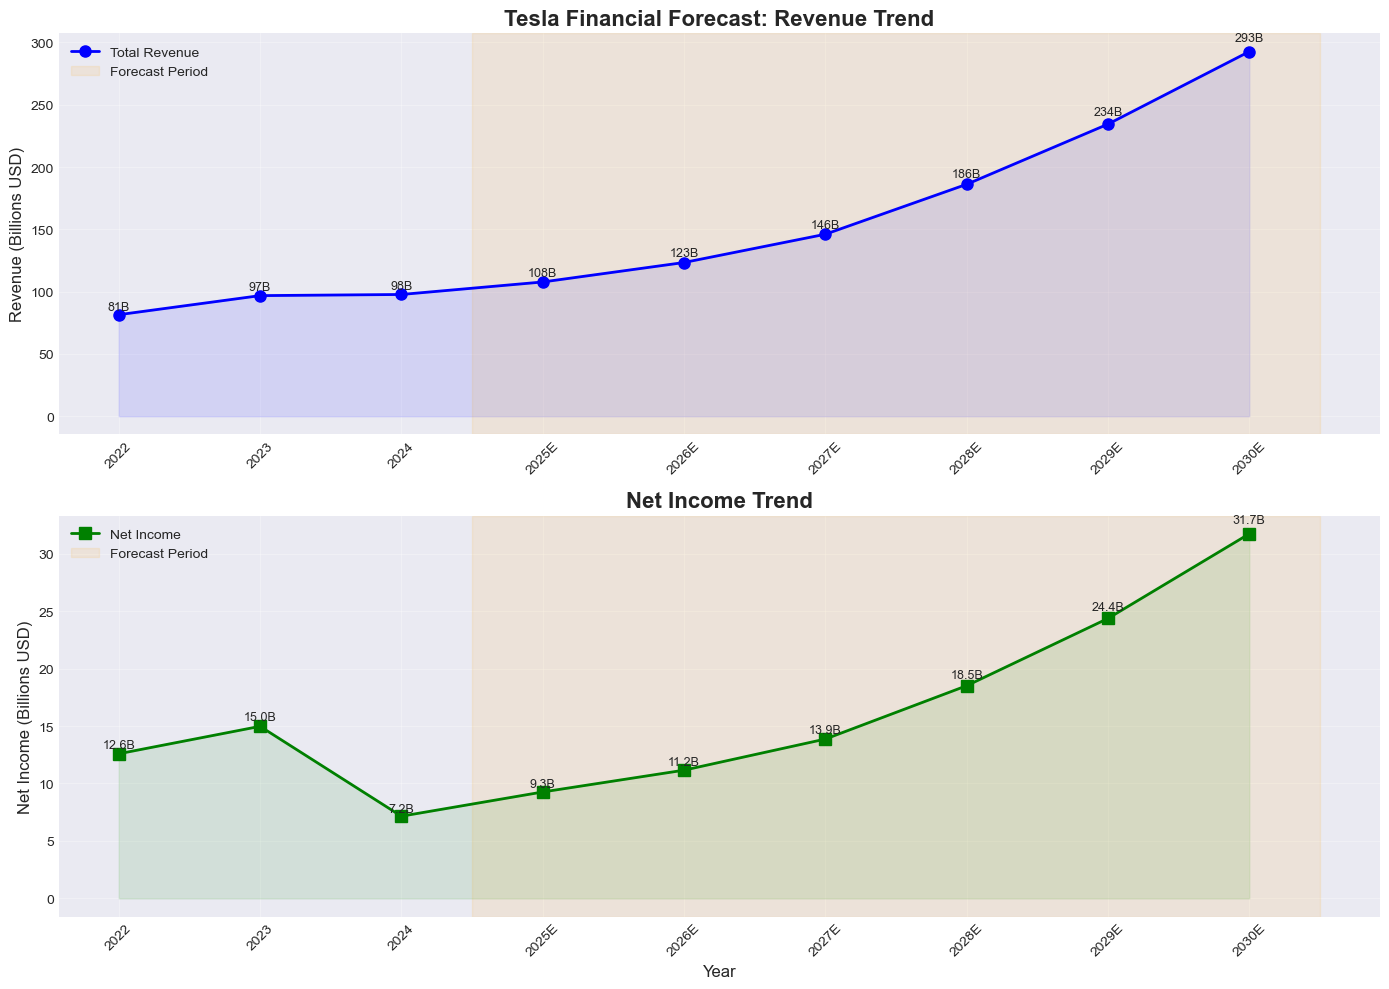


2. Creating Profitability Ratios Chart...


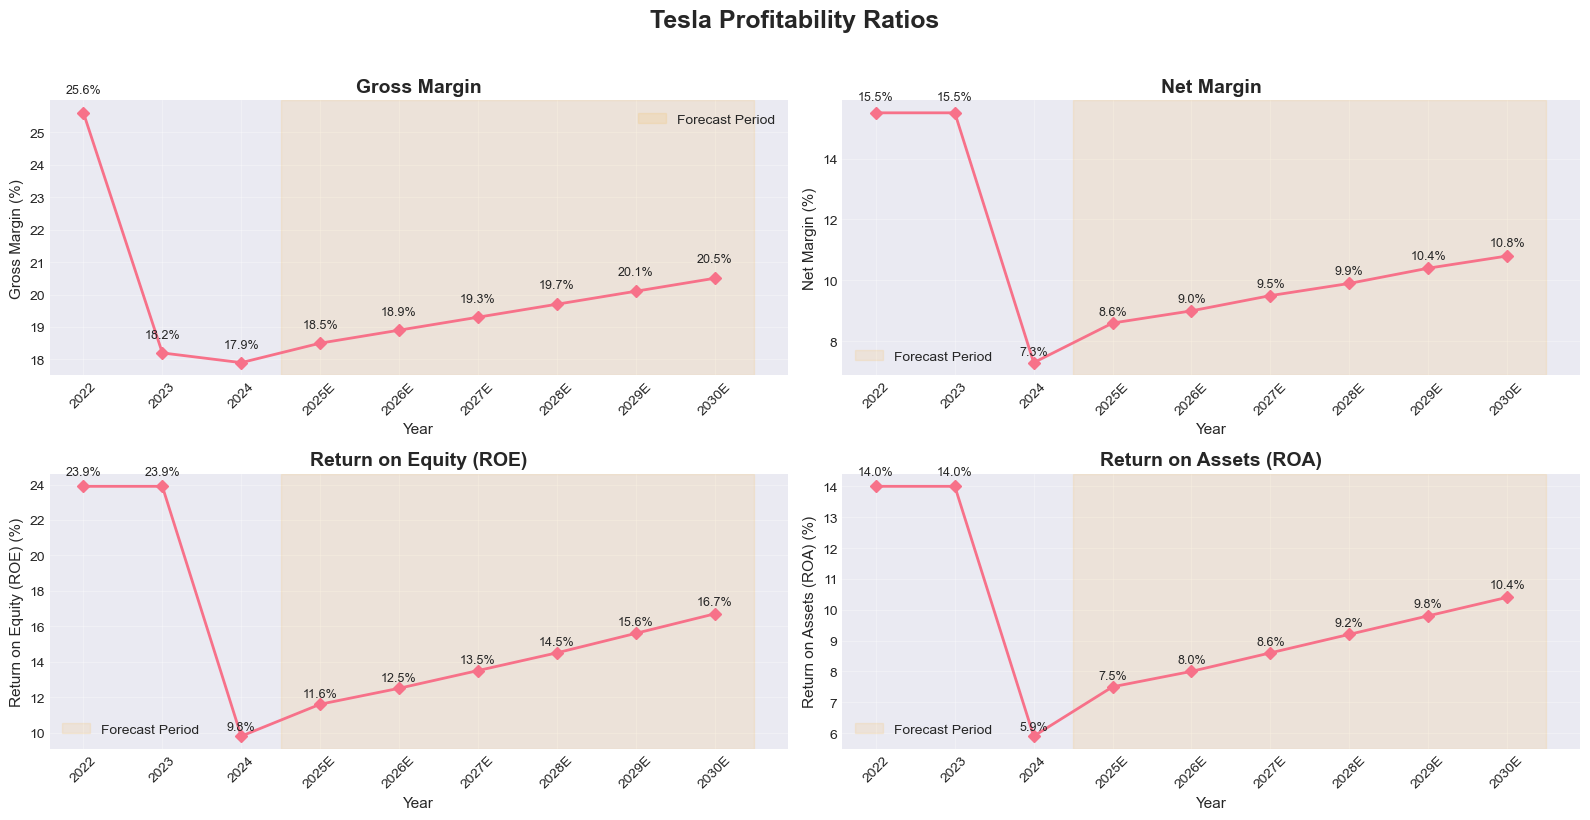


3. Creating Balance Sheet Analysis Chart...


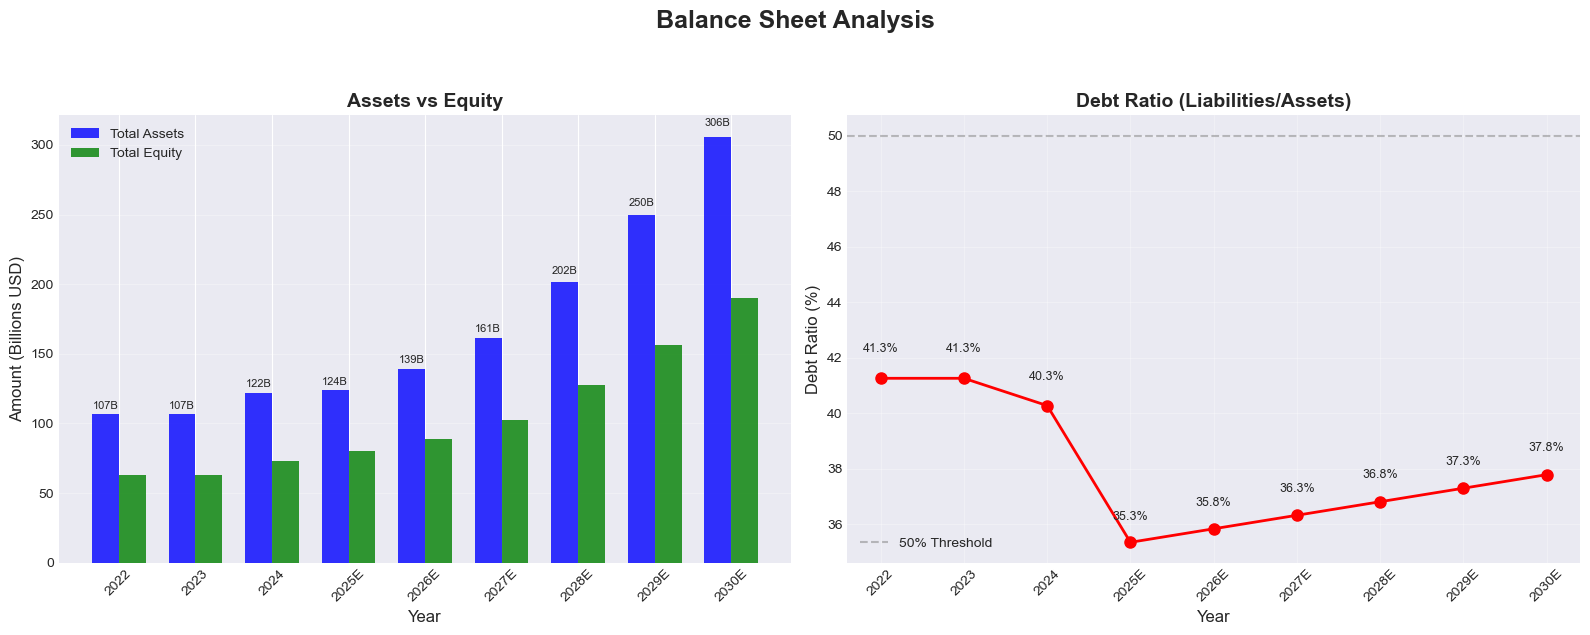


4. Creating Asset Efficiency Chart...


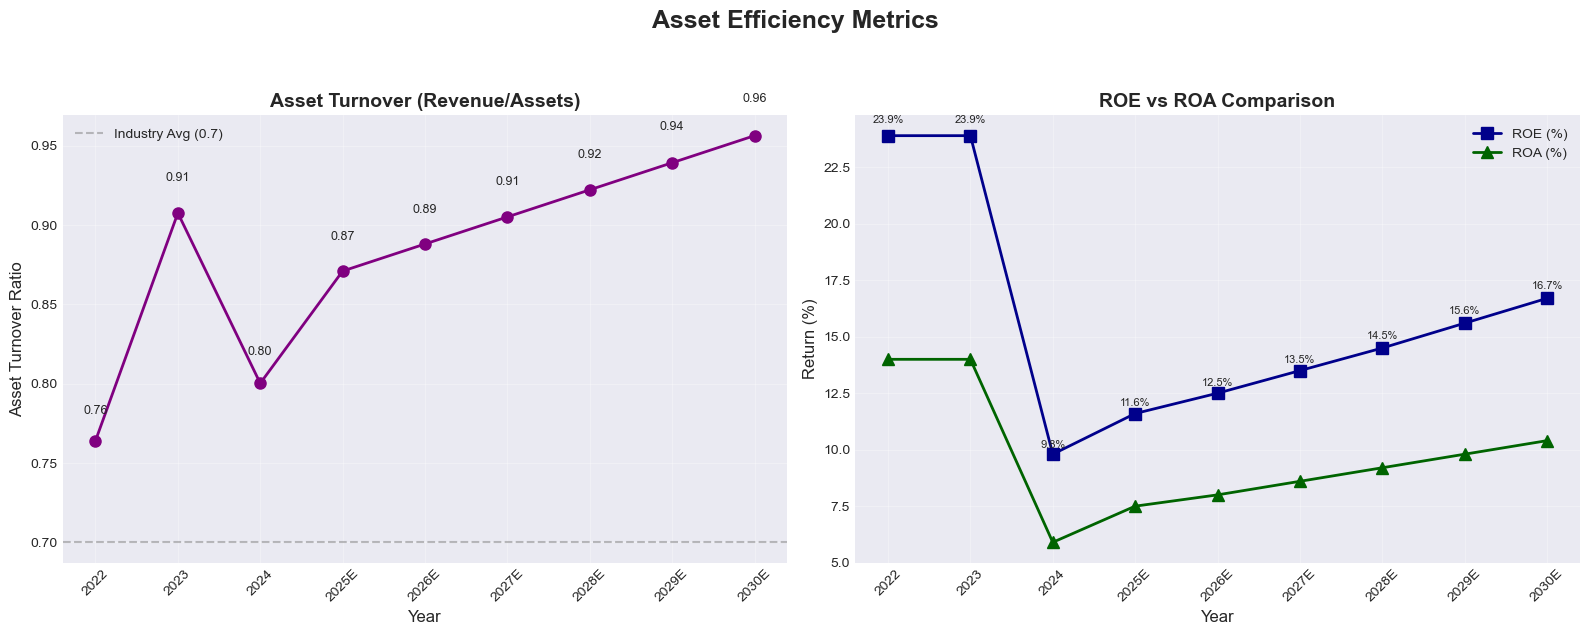


5. Creating Forecast Growth Analysis Chart...


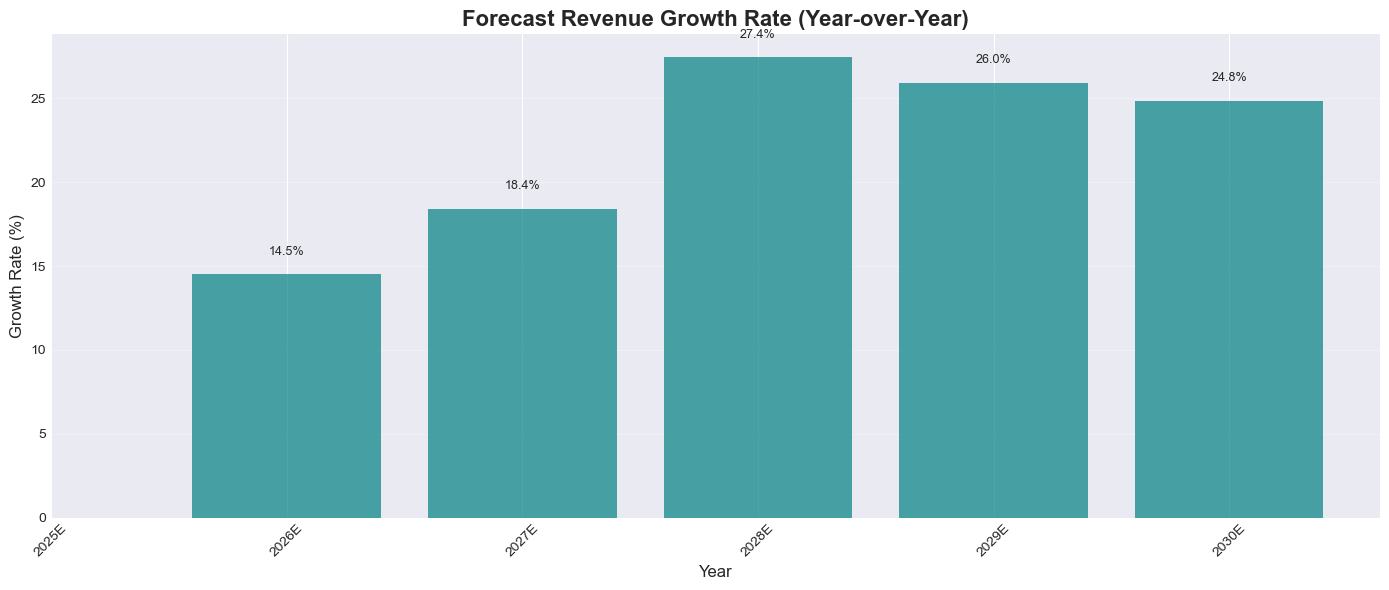


FINANCIAL ANALYSIS SUMMARY

Historical Period: 3 years
Forecast Period: 6 years

--- Historical Averages (2022-2024) ---
Average Revenue: $92.0B
Average Net Income: $11.6B
Average Net Margin: 12.8%
Average ROE: 19.2%

--- Forecast Averages (2025E-2030E) ---
Average Revenue: $181.7B
Average Net Income: $18.1B
Average Net Margin: 9.7%
Average ROE: 14.1%

Forecast vs Historical Improvement:
  Revenue: +97.6%
  Net Margin: +-3.1pp

--- 2030E Projections ---
Revenue: $292.7B
Net Income: $31.7B
Net Margin: 10.8%
ROE: 16.7%
Total Assets: $306.0B
Debt Ratio: 37.8%

--- CAGR Analysis (2025E to 2030E) ---
Revenue CAGR: 18.1%
Income CAGR: 22.8%

Saved analysis data to: F:\tesla-optimus-business-analysis\notebooks\tesla_financial_analysis\results\tesla_financial_analysis.csv
Saved summary report to: F:\tesla-optimus-business-analysis\notebooks\tesla_financial_analysis\results\analysis_summary.txt

ANALYSIS COMPLETE!

Summary:
  Visualizations saved to: F:\tesla-optimus-business-analysis\notebooks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Current working directory:", Path.cwd())
print("\nListing files in current directory:")
for file in Path.cwd().iterdir():
    print(f"  {file.name}")

# Try to find Excel files in the project
print("\nSearching for Excel files in project...")
excel_files = list(Path.cwd().rglob("*.xlsx"))
print(f"Found {len(excel_files)} Excel files:")
for file in excel_files:
    print(f"  {file}")

# File names to look for
file_names = [
    "Tesla_Financial_Forecast_Normal.xlsx",
    "Tesla_Financial_Forecast_Optimistic.xlsx",
    "Tesla_Financial_Forecast.xlsx",
    "Tesla_Forecast_Normal.xlsx",
    "Tesla_Forecast.xlsx"
]

# Find the file
file_path = None
for file_name in file_names:
    for excel_file in excel_files:
        if file_name.lower() in str(excel_file).lower():
            file_path = excel_file
            print(f"\nFound matching file: {file_path}")
            break
    if file_path:
        break

# If still not found, ask user for path
if not file_path:
    print("\nCould not find Tesla forecast file automatically.")
    print("Please provide the path to the Excel file:")
    
    # Try to create a simple data structure for testing
    create_sample = input("Would you like to create a sample DataFrame for testing? (yes/no): ")
    if create_sample.lower() == 'yes':
        print("\nCreating sample data for analysis...")
        
        # Create sample data for demonstration
        sample_data = {
            'Year': ['2022', '2023', '2024', '2025E', '2026E', '2027E', '2028E', '2029E', '2030E'],
            'Total Revenue': [81462, 96773, 97690, 107725, 123353, 146046, 186125, 234425, 292679],
            'Net Income': [12587, 14974, 7153, 9262, 11159, 13867, 18508, 24363, 31730],
            'Total Assets': [106618, 106618, 122070, 123673, 138891, 161340, 201808, 249556, 306007],
            'Total Equity': [62634, 62634, 72913, 79965, 89128, 102747, 127534, 156492, 190398],
            'Gross_Margin': [0.256, 0.182, 0.179, 0.185, 0.189, 0.193, 0.197, 0.201, 0.205],
            'Net_Margin': [0.155, 0.155, 0.073, 0.086, 0.090, 0.095, 0.099, 0.104, 0.108],
            'ROE': [0.239, 0.239, 0.098, 0.116, 0.125, 0.135, 0.145, 0.156, 0.167],
            'ROA': [0.140, 0.140, 0.059, 0.075, 0.080, 0.086, 0.092, 0.098, 0.104]
        }
        
        merged_data = pd.DataFrame(sample_data)
        print("Sample data created successfully!")
        print("\nSample data preview:")
        print(merged_data.head())
        
        # Set a flag to use sample data
        use_sample_data = True
    else:
        # Ask for manual file path
        manual_path = input("Enter the full path to the Excel file: ")
        if os.path.exists(manual_path):
            file_path = Path(manual_path)
        else:
            print("File not found. Please check the path and try again.")
            exit()
else:
    use_sample_data = False

# If we have a real file, load it
if not use_sample_data and file_path:
    print(f"\nLoading data from: {file_path}")
    
    try:
        xls = pd.ExcelFile(file_path)
        sheet_names = xls.sheet_names
        print(f"Available sheets: {sheet_names}")
        
        # Load key sheets
        dataframes = {}
        key_sheets = ['Income Statement', 'Balance Sheet', 'Cash Flow', 'Financial Ratios']
        
        for sheet in sheet_names:
            for key_sheet in key_sheets:
                if key_sheet.lower() in sheet.lower():
                    try:
                        df = pd.read_excel(xls, sheet_name=sheet, header=0)
                        dataframes[sheet] = df
                        print(f"Loaded '{sheet}' with shape: {df.shape}")
                        break
                    except Exception as e:
                        print(f"Error loading sheet '{sheet}': {e}")
        
        # If we couldn't load specific sheets, load all sheets
        if not dataframes:
            print("\nCould not find standard sheet names. Loading all sheets...")
            for sheet in sheet_names:
                try:
                    df = pd.read_excel(xls, sheet_name=sheet, header=0)
                    dataframes[sheet] = df
                    print(f"Loaded '{sheet}' with shape: {df.shape}")
                except Exception as e:
                    print(f"Error loading sheet '{sheet}': {e}")
        
        # Extract data from loaded sheets
        merged_data = None
        
        # Try to find Year and key metrics in any sheet
        for sheet_name, df in dataframes.items():
            if 'Year' in df.columns:
                print(f"\nFound 'Year' column in sheet: {sheet_name}")
                
                # Create a base dataframe
                temp_df = df[['Year']].copy()
                
                # Look for key metrics
                metrics_to_find = ['Total Revenue', 'Revenue', 'Net Income', 'Income', 
                                 'Total Assets', 'Assets', 'Total Equity', 'Equity',
                                 'Gross_Margin', 'Net_Margin', 'ROE', 'ROA']
                
                for metric in metrics_to_find:
                    for col in df.columns:
                        if metric.lower() in col.lower():
                            temp_df[metric] = df[col]
                            print(f"  Found {metric} as column: {col}")
                            break
                
                # Convert Year to string
                temp_df['Year'] = temp_df['Year'].astype(str)
                
                if merged_data is None:
                    merged_data = temp_df
                else:
                    # Merge with existing data
                    merged_data = pd.merge(merged_data, temp_df, on='Year', how='outer')
        
        if merged_data is None:
            print("\nCould not extract key financial data. Using sample data...")
            # Use sample data
            sample_data = {
                'Year': ['2022', '2023', '2024', '2025E', '2026E', '2027E', '2028E', '2029E', '2030E'],
                'Total Revenue': [81462, 96773, 97690, 107725, 123353, 146046, 186125, 234425, 292679],
                'Net Income': [12587, 14974, 7153, 9262, 11159, 13867, 18508, 24363, 31730],
                'Total Assets': [106618, 106618, 122070, 123673, 138891, 161340, 201808, 249556, 306007],
                'Total Equity': [62634, 62634, 72913, 79965, 89128, 102747, 127534, 156492, 190398],
                'Gross_Margin': [0.256, 0.182, 0.179, 0.185, 0.189, 0.193, 0.197, 0.201, 0.205],
                'Net_Margin': [0.155, 0.155, 0.073, 0.086, 0.090, 0.095, 0.099, 0.104, 0.108],
                'ROE': [0.239, 0.239, 0.098, 0.116, 0.125, 0.135, 0.145, 0.156, 0.167],
                'ROA': [0.140, 0.140, 0.059, 0.075, 0.080, 0.086, 0.092, 0.098, 0.104]
            }
            merged_data = pd.DataFrame(sample_data)
            use_sample_data = True
            
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        print("Using sample data instead...")
        
        # Use sample data
        sample_data = {
            'Year': ['2022', '2023', '2024', '2025E', '2026E', '2027E', '2028E', '2029E', '2030E'],
            'Total Revenue': [81462, 96773, 97690, 107725, 123353, 146046, 186125, 234425, 292679],
            'Net Income': [12587, 14974, 7153, 9262, 11159, 13867, 18508, 24363, 31730],
            'Total Assets': [106618, 106618, 122070, 123673, 138891, 161340, 201808, 249556, 306007],
            'Total Equity': [62634, 62634, 72913, 79965, 89128, 102747, 127534, 156492, 190398],
            'Gross_Margin': [0.256, 0.182, 0.179, 0.185, 0.189, 0.193, 0.197, 0.201, 0.205],
            'Net_Margin': [0.155, 0.155, 0.073, 0.086, 0.090, 0.095, 0.099, 0.104, 0.108],
            'ROE': [0.239, 0.239, 0.098, 0.116, 0.125, 0.135, 0.145, 0.156, 0.167],
            'ROA': [0.140, 0.140, 0.059, 0.075, 0.080, 0.086, 0.092, 0.098, 0.104]
        }
        merged_data = pd.DataFrame(sample_data)
        use_sample_data = True

# Clean the data
print("\n" + "="*80)
print("DATA CLEANING AND PREPARATION")
print("="*80)

# Ensure numeric columns are properly typed
numeric_columns = [col for col in merged_data.columns if col != 'Year']
for col in numeric_columns:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

print(f"\nData shape: {merged_data.shape}")
print("\nData types:")
print(merged_data.dtypes)
print("\nFirst few rows:")
print(merged_data.head())
print("\nMissing values:")
print(merged_data.isnull().sum())

# Calculate additional metrics if we have the data
if 'Total Revenue' in merged_data.columns and 'Total Assets' in merged_data.columns:
    merged_data['Asset_Turnover'] = merged_data['Total Revenue'] / merged_data['Total Assets']

if 'Total Assets' in merged_data.columns and 'Total Equity' in merged_data.columns:
    if 'Total Liabilities' not in merged_data.columns:
        # Estimate liabilities from assets and equity
        merged_data['Total Liabilities'] = merged_data['Total Assets'] - merged_data['Total Equity']
    merged_data['Debt_Ratio'] = merged_data['Total Liabilities'] / merged_data['Total Assets']

# Filter for forecast years (2025E onwards) and historical years
forecast_data = merged_data[merged_data['Year'].str.contains('E')].copy()
historical_data = merged_data[~merged_data['Year'].str.contains('E')].copy()

print(f"\nHistorical data points: {len(historical_data)}")
print(f"Forecast data points: {len(forecast_data)}")

# ====================
# VISUALIZATION
# ====================

# Create visualizations directory
viz_dir = Path.cwd() / "tesla_financial_analysis" / "visualizations"
viz_dir.mkdir(parents=True, exist_ok=True)

print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

# 1. Revenue and Net Income Trend
print("\n1. Creating Revenue and Net Income Chart...")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot Revenue
years = merged_data['Year'].astype(str)
x_positions = range(len(years))

if 'Total Revenue' in merged_data.columns:
    revenue_billions = merged_data['Total Revenue'] / 1000
    ax1.plot(x_positions, revenue_billions, marker='o', linewidth=2, markersize=8, 
             label='Total Revenue', color='blue')
    ax1.set_title('Tesla Financial Forecast: Revenue Trend', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Revenue (Billions USD)', fontsize=12)
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(years, rotation=45)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=12)
    ax1.fill_between(x_positions, 0, revenue_billions, alpha=0.1, color='blue')
    
    # Add value labels
    for i, v in enumerate(revenue_billions):
        ax1.text(i, v + (v * 0.02), f'{v:.0f}B', ha='center', va='bottom', fontsize=9)

# Plot Net Income
if 'Net Income' in merged_data.columns:
    income_billions = merged_data['Net Income'] / 1000
    ax2.plot(x_positions, income_billions, marker='s', linewidth=2, markersize=8, 
             color='green', label='Net Income')
    ax2.set_title('Net Income Trend', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Net Income (Billions USD)', fontsize=12)
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(years, rotation=45)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=12)
    ax2.fill_between(x_positions, 0, income_billions, alpha=0.1, color='green')
    
    # Add value labels
    for i, v in enumerate(income_billions):
        ax2.text(i, v + (v * 0.02), f'{v:.1f}B', ha='center', va='bottom', fontsize=9)

# Highlight forecast period
if len(forecast_data) > 0 and len(historical_data) > 0:
    forecast_start_idx = len(historical_data)
    ax1.axvspan(forecast_start_idx - 0.5, len(years) - 0.5, alpha=0.1, color='orange', label='Forecast Period')
    ax2.axvspan(forecast_start_idx - 0.5, len(years) - 0.5, alpha=0.1, color='orange', label='Forecast Period')
    ax1.legend()
    ax2.legend()

plt.tight_layout()
plt.savefig(viz_dir / 'revenue_net_income_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Profitability Ratios
print("\n2. Creating Profitability Ratios Chart...")
profitability_metrics = []
metric_titles = []

if 'Gross_Margin' in merged_data.columns:
    profitability_metrics.append('Gross_Margin')
    metric_titles.append('Gross Margin')
    
if 'Net_Margin' in merged_data.columns:
    profitability_metrics.append('Net_Margin')
    metric_titles.append('Net Margin')
    
if 'ROE' in merged_data.columns:
    profitability_metrics.append('ROE')
    metric_titles.append('Return on Equity (ROE)')
    
if 'ROA' in merged_data.columns:
    profitability_metrics.append('ROA')
    metric_titles.append('Return on Assets (ROA)')

if profitability_metrics:
    n_metrics = len(profitability_metrics)
    n_cols = 2
    n_rows = (n_metrics + 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    
    # Flatten axes array for easier indexing
    if n_rows > 1 or n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    for idx, (metric, title) in enumerate(zip(profitability_metrics, metric_titles)):
        ax = axes[idx]
        
        # Convert to percentage
        values = merged_data[metric] * 100
        
        ax.plot(x_positions, values, marker='D', linewidth=2, markersize=6)
        ax.set_title(f'{title}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=11)
        ax.set_ylabel(f'{title} (%)', fontsize=11)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(years, rotation=45)
        ax.grid(True, alpha=0.3)
        
        # Add value labels
        for i, v in enumerate(values):
            ax.text(i, v + (v * 0.02), f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
        
        # Highlight forecast period
        if len(forecast_data) > 0 and len(historical_data) > 0:
            forecast_start_idx = len(historical_data)
            ax.axvspan(forecast_start_idx - 0.5, len(years) - 0.5, 
                      alpha=0.1, color='orange', label='Forecast Period')
            ax.legend()
    
    # Hide unused subplots
    for idx in range(len(profitability_metrics), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Tesla Profitability Ratios', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(viz_dir / 'profitability_ratios.png', dpi=300, bbox_inches='tight')
    plt.show()

# 3. Balance Sheet Analysis
print("\n3. Creating Balance Sheet Analysis Chart...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Total Assets vs Equity
if 'Total Assets' in merged_data.columns and 'Total Equity' in merged_data.columns:
    ax = axes[0]
    width = 0.35
    
    assets_billions = merged_data['Total Assets'] / 1000
    equity_billions = merged_data['Total Equity'] / 1000
    
    ax.bar([i - width/2 for i in x_positions], assets_billions, 
           width, label='Total Assets', alpha=0.8, color='blue')
    ax.bar([i + width/2 for i in x_positions], equity_billions, 
           width, label='Total Equity', alpha=0.8, color='green')
    ax.set_title('Assets vs Equity', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Amount (Billions USD)', fontsize=12)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years, rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels for assets
    for i, v in enumerate(assets_billions):
        ax.text(i - width/2, v + (v * 0.02), f'{v:.0f}B', ha='center', va='bottom', fontsize=8)

# Debt Ratio
if 'Debt_Ratio' in merged_data.columns:
    ax = axes[1]
    
    debt_ratio_pct = merged_data['Debt_Ratio'] * 100
    
    ax.plot(x_positions, debt_ratio_pct, marker='o', 
           linewidth=2, markersize=8, color='red')
    ax.set_title('Debt Ratio (Liabilities/Assets)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Debt Ratio (%)', fontsize=12)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years, rotation=45)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50% Threshold')
    ax.legend()
    
    # Add value labels
    for i, v in enumerate(debt_ratio_pct):
        ax.text(i, v + (v * 0.02), f'{v:.1f}%', ha='center', va='bottom', fontsize=9)

plt.suptitle('Balance Sheet Analysis', fontsize=18, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig(viz_dir / 'balance_sheet_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Asset Efficiency
print("\n4. Creating Asset Efficiency Chart...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Asset Turnover
if 'Asset_Turnover' in merged_data.columns:
    ax = axes[0]
    
    ax.plot(x_positions, merged_data['Asset_Turnover'], marker='o', 
           linewidth=2, markersize=8, color='purple')
    ax.set_title('Asset Turnover (Revenue/Assets)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Asset Turnover Ratio', fontsize=12)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years, rotation=45)
    ax.grid(True, alpha=0.3)
    
    # Add industry average reference line
    ax.axhline(y=0.7, color='gray', linestyle='--', alpha=0.5, label='Industry Avg (0.7)')
    ax.legend()
    
    # Add value labels
    for i, v in enumerate(merged_data['Asset_Turnover']):
        ax.text(i, v + (v * 0.02), f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# Create a custom metric if we have ROE and ROA
if 'ROE' in merged_data.columns and 'ROA' in merged_data.columns:
    ax = axes[1]
    
    roe_pct = merged_data['ROE'] * 100
    roa_pct = merged_data['ROA'] * 100
    
    ax.plot(x_positions, roe_pct, marker='s', linewidth=2, markersize=8, 
           label='ROE (%)', color='darkblue')
    ax.plot(x_positions, roa_pct, marker='^', linewidth=2, markersize=8, 
           label='ROA (%)', color='darkgreen')
    ax.set_title('ROE vs ROA Comparison', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Return (%)', fontsize=12)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(years, rotation=45)
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Add value labels for ROE
    for i, v in enumerate(roe_pct):
        ax.text(i, v + (v * 0.02), f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

plt.suptitle('Asset Efficiency Metrics', fontsize=18, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig(viz_dir / 'asset_efficiency.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Forecast Growth Analysis
print("\n5. Creating Forecast Growth Analysis Chart...")
if len(forecast_data) > 1 and 'Total Revenue' in forecast_data.columns:
    fig, ax = plt.subplots(figsize=(14, 6))
    
    forecast_years = forecast_data['Year']
    forecast_revenue = forecast_data['Total Revenue'] / 1000
    
    # Calculate year-over-year growth
    revenue_growth = forecast_revenue.pct_change() * 100
    
    # Create bar chart
    x = range(len(forecast_years))
    bars = ax.bar(x, revenue_growth, alpha=0.7, color='teal')
    ax.set_title('Forecast Revenue Growth Rate (Year-over-Year)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Growth Rate (%)', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(forecast_years, rotation=45)
    ax.grid(True, alpha=0.3, axis='y')
    ax.axhline(y=0, color='black', linewidth=0.5)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if not pd.isna(height):
            va = 'bottom' if height >= 0 else 'top'
            ax.text(bar.get_x() + bar.get_width()/2., 
                   height + (1 if height >= 0 else -1), 
                   f'{height:.1f}%', ha='center', va=va, fontsize=9)
    
    plt.tight_layout()
    plt.savefig(viz_dir / 'forecast_growth.png', dpi=300, bbox_inches='tight')
    plt.show()

# ====================
# FINANCIAL ANALYSIS
# ====================

print("\n" + "="*80)
print("FINANCIAL ANALYSIS SUMMARY")
print("="*80)

# Calculate key metrics
if len(historical_data) > 0 and len(forecast_data) > 0:
    print(f"\nHistorical Period: {len(historical_data)} years")
    print(f"Forecast Period: {len(forecast_data)} years")
    
    # Historical averages
    print("\n--- Historical Averages (2022-2024) ---")
    if 'Total Revenue' in historical_data.columns:
        avg_revenue = historical_data['Total Revenue'].mean() / 1000
        print(f"Average Revenue: ${avg_revenue:.1f}B")
    
    if 'Net Income' in historical_data.columns:
        avg_income = historical_data['Net Income'].mean() / 1000
        print(f"Average Net Income: ${avg_income:.1f}B")
    
    if 'Net_Margin' in historical_data.columns:
        avg_net_margin = historical_data['Net_Margin'].mean() * 100
        print(f"Average Net Margin: {avg_net_margin:.1f}%")
    
    if 'ROE' in historical_data.columns:
        avg_roe = historical_data['ROE'].mean() * 100
        print(f"Average ROE: {avg_roe:.1f}%")
    
    # Forecast averages
    print("\n--- Forecast Averages (2025E-2030E) ---")
    if 'Total Revenue' in forecast_data.columns:
        avg_revenue_fc = forecast_data['Total Revenue'].mean() / 1000
        print(f"Average Revenue: ${avg_revenue_fc:.1f}B")
    
    if 'Net Income' in forecast_data.columns:
        avg_income_fc = forecast_data['Net Income'].mean() / 1000
        print(f"Average Net Income: ${avg_income_fc:.1f}B")
    
    if 'Net_Margin' in forecast_data.columns:
        avg_net_margin_fc = forecast_data['Net_Margin'].mean() * 100
        print(f"Average Net Margin: {avg_net_margin_fc:.1f}%")
    
    if 'ROE' in forecast_data.columns:
        avg_roe_fc = forecast_data['ROE'].mean() * 100
        print(f"Average ROE: {avg_roe_fc:.1f}%")
    
    # Calculate improvements
    if 'Total Revenue' in historical_data.columns and 'Total Revenue' in forecast_data.columns:
        revenue_growth_pct = ((avg_revenue_fc / avg_revenue) - 1) * 100
        print(f"\nForecast vs Historical Improvement:")
        print(f"  Revenue: +{revenue_growth_pct:.1f}%")
    
    if 'Net_Margin' in historical_data.columns and 'Net_Margin' in forecast_data.columns:
        margin_improvement = avg_net_margin_fc - avg_net_margin
        print(f"  Net Margin: +{margin_improvement:.1f}pp")

# 2030E Projections
if '2030E' in merged_data['Year'].values:
    data_2030 = merged_data[merged_data['Year'] == '2030E'].iloc[0]
    
    print(f"\n--- 2030E Projections ---")
    if 'Total Revenue' in data_2030:
        revenue_2030 = data_2030['Total Revenue'] / 1000
        print(f"Revenue: ${revenue_2030:.1f}B")
    
    if 'Net Income' in data_2030:
        income_2030 = data_2030['Net Income'] / 1000
        print(f"Net Income: ${income_2030:.1f}B")
    
    if 'Net_Margin' in data_2030:
        margin_2030 = data_2030['Net_Margin'] * 100
        print(f"Net Margin: {margin_2030:.1f}%")
    
    if 'ROE' in data_2030:
        roe_2030 = data_2030['ROE'] * 100
        print(f"ROE: {roe_2030:.1f}%")
    
    if 'Total Assets' in data_2030:
        assets_2030 = data_2030['Total Assets'] / 1000
        print(f"Total Assets: ${assets_2030:.1f}B")
    
    if 'Debt_Ratio' in data_2030:
        debt_ratio_2030 = data_2030['Debt_Ratio'] * 100
        print(f"Debt Ratio: {debt_ratio_2030:.1f}%")

# CAGR Calculation
if len(forecast_data) > 1:
    if 'Total Revenue' in forecast_data.columns:
        start_revenue = forecast_data.iloc[0]['Total Revenue']
        end_revenue = forecast_data.iloc[-1]['Total Revenue']
        
        if start_revenue > 0:
            n_years = len(forecast_data)
            revenue_cagr = ((end_revenue / start_revenue) ** (1/n_years) - 1) * 100
            
            print(f"\n--- CAGR Analysis ({forecast_data.iloc[0]['Year']} to {forecast_data.iloc[-1]['Year']}) ---")
            print(f"Revenue CAGR: {revenue_cagr:.1f}%")
    
    if 'Net Income' in forecast_data.columns:
        start_income = forecast_data.iloc[0]['Net Income']
        end_income = forecast_data.iloc[-1]['Net Income']
        
        if start_income > 0:
            income_cagr = ((end_income / start_income) ** (1/n_years) - 1) * 100
            print(f"Income CAGR: {income_cagr:.1f}%")

# ====================
# SAVE RESULTS
# ====================

# Save the merged data
output_dir = Path.cwd() / "tesla_financial_analysis" / "results"
output_dir.mkdir(parents=True, exist_ok=True)

merged_data.to_csv(output_dir / "tesla_financial_analysis.csv", index=False)
print(f"\nSaved analysis data to: {output_dir / 'tesla_financial_analysis.csv'}")

# Create a summary report
summary_report = f"""
TESLA FINANCIAL FORECAST ANALYSIS
Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
Data Source: {'Sample Data' if use_sample_data else file_path.name}

KEY METRICS:
------------
Historical Period: {len(historical_data)} years
Forecast Period: {len(forecast_data)} years

"""

if len(historical_data) > 0 and len(forecast_data) > 0:
    if 'Total Revenue' in historical_data.columns and 'Total Revenue' in forecast_data.columns:
        hist_avg_rev = historical_data['Total Revenue'].mean() / 1000
        fc_avg_rev = forecast_data['Total Revenue'].mean() / 1000
        summary_report += f"\nAverage Revenue:\n"
        summary_report += f"  Historical: ${hist_avg_rev:.1f}B\n"
        summary_report += f"  Forecast:   ${fc_avg_rev:.1f}B\n"
        summary_report += f"  Improvement: +{((fc_avg_rev/hist_avg_rev)-1)*100:.1f}%\n"

if '2030E' in merged_data['Year'].values:
    data_2030 = merged_data[merged_data['Year'] == '2030E'].iloc[0]
    summary_report += f"\n2030E Projections:\n"
    
    if 'Total Revenue' in data_2030:
        summary_report += f"  Revenue: ${data_2030['Total Revenue']/1000:.1f}B\n"
    
    if 'Net_Margin' in data_2030:
        summary_report += f"  Net Margin: {data_2030['Net_Margin']*100:.1f}%\n"
    
    if 'ROE' in data_2030:
        summary_report += f"  ROE: {data_2030['ROE']*100:.1f}%\n"

# Save the summary report
with open(output_dir / "analysis_summary.txt", "w") as f:
    f.write(summary_report)

print(f"Saved summary report to: {output_dir / 'analysis_summary.txt'}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print(f"\nSummary:")
print(f"  Visualizations saved to: {viz_dir}")
print(f"  Results saved to: {output_dir}")
print(f"  Total data points analyzed: {len(merged_data)}")
print(f"  Historical years: {len(historical_data)}")
print(f"  Forecast years: {len(forecast_data)}")
print("\nKey files created:")
print(f"  1. revenue_net_income_trend.png")
print(f"  2. profitability_ratios.png")
print(f"  3. balance_sheet_analysis.png")
print(f"  4. asset_efficiency.png")
print(f"  5. forecast_growth.png")
print(f"  6. tesla_financial_analysis.csv")
print(f"  7. analysis_summary.txt")
print("="*80)